In [116]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits

In [150]:
dr='J1515+5529/'
image_data = fits.getdata(dr + 'legacysurvey-2289p555-image-z.fits')
var_data = fits.getdata(dr + 'legacysurvey-2289p555-invvar-z.fits.fz')
#image_data = fits.open('J1113+01/cutout_168.3380_1.3437.fits')

In [37]:
var_data = 1/(var_data_0)**2
#new_image = image_data
#new_image = image_data/np.sum(image_data)
#hdu = fits.PrimaryHDU(new_image)
#hdu.writeto('../J1046+57/psf_norm.fits', clobber=True)
#image_data=fits.getdata('J1329+56/image.fits')

<ipython-input-37-7e95cd4dd647>:1: RuntimeWarning: divide by zero encountered in true_divide
  var_data = 1/(var_data_0)**2


In [157]:
from astropy.nddata import Cutout2D
from astropy import units as u
position = (3317.3849, 1786.8246)
size = (110, 110)   # pixels
#position = (853, 954)
#size = (410, 410)   # pixels
cutout = Cutout2D(image_data, position, size)

<ipython-input-158-3952c1cf9729>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.imshow(cutout.data, cmap='gray', Norm=LogNorm())


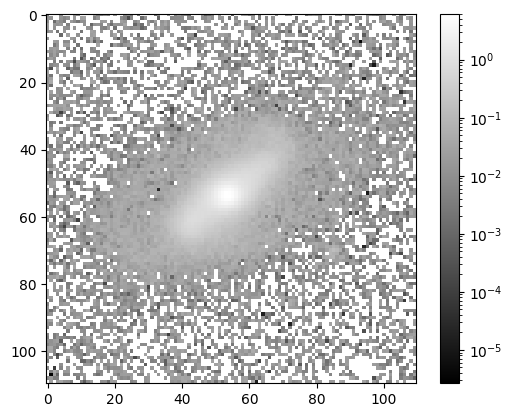

In [158]:
from matplotlib.colors import LogNorm
plt.imshow(cutout.data, cmap='gray', Norm=LogNorm())
plt.colorbar()

In [159]:
hdu = fits.PrimaryHDU(cutout.data)
hdu.writeto(dr + 'image.fits', clobber=True)

<ipython-input-160-4c3d93387367>:1: RuntimeWarning: divide by zero encountered in true_divide
  cutout = Cutout2D(1/np.sqrt(var_data), position, size)
<ipython-input-160-4c3d93387367>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.imshow(cutout.data, cmap='gray', Norm=LogNorm())


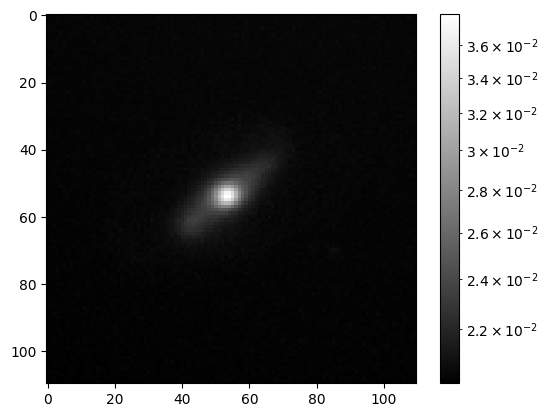

In [160]:
cutout = Cutout2D(1/np.sqrt(var_data), position, size)
from matplotlib.colors import LogNorm
plt.imshow(cutout.data, cmap='gray', Norm=LogNorm())
plt.colorbar()

In [161]:
hdu = fits.PrimaryHDU(cutout.data)
hdu.writeto(dr + 'err.fits', clobber=True)

<ipython-input-51-8b912372f61c>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.imshow(cutout2.data, cmap='gray', Norm=LogNorm())


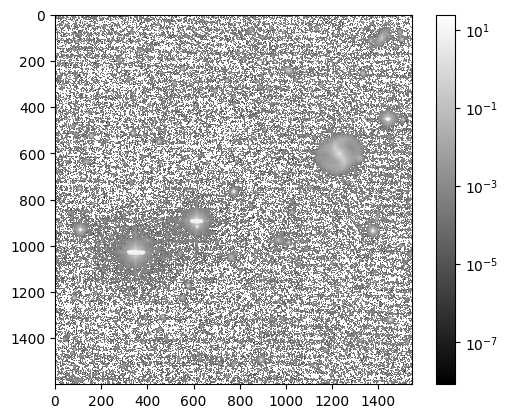

In [51]:
from astropy.nddata import Cutout2D
from astropy import units as u
position = (2856, 2500)
size = (1600, 1600)   # pixels
cutout2 = Cutout2D(image_data, position, size)
from matplotlib.colors import LogNorm
plt.imshow(cutout2.data, cmap='gray', Norm=LogNorm())
plt.colorbar()

In [52]:
hdu = fits.PrimaryHDU(cutout2.data)
hdu.writeto(dr + 'forpsf.fits', clobber=True)

In [144]:
GAIN = 4.44
std_sky = np.std(cutout2.data)
flux_sky = std_sky**2 * GAIN
print(flux_sky)
print(std_sky)

292.52548953034784
8.116903


<ipython-input-145-43df6bb0f62e>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.imshow(err_flux_gal, cmap='gray', Norm=LogNorm())


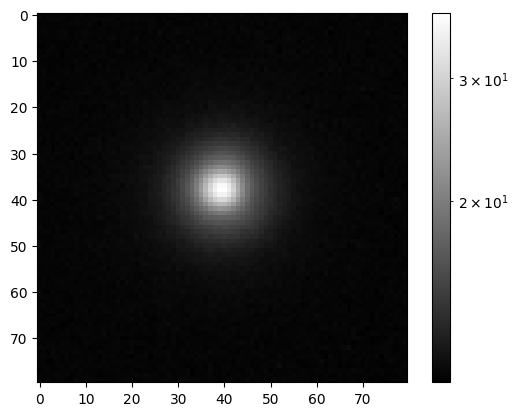

In [145]:
gal = cutout.data
full_gal_data = gal + flux_sky
err_flux_gal = np.sqrt(full_gal_data/GAIN)
hdu = fits.PrimaryHDU(err_flux_gal)
hdu.writeto(dr+'err.fits', clobber=True)
plt.imshow(err_flux_gal, cmap='gray', Norm=LogNorm())
plt.colorbar()

In [16]:
print(full_gal_data)

[[ 0.06010371  0.03346429 -0.02005699 ...  0.02737004  0.07385816
  -0.03033293]
 [ 0.03656945  0.04619425 -0.01761221 ... -0.00186983  0.02420021
   0.05799449]
 [ 0.04258368  0.04615483 -0.00295147 ... -0.00054819 -0.09105538
   0.05743505]
 ...
 [ 0.02475548  0.00201543 -0.00812818 ... -0.06040557  0.04681403
   0.03183781]
 [ 0.00906402  0.01152881  0.06819886 ... -0.04739626 -0.02798209
  -0.00111156]
 [-0.05481873 -0.04910634 -0.01341279 ... -0.01486955  0.00970253
  -0.03628648]]


In [151]:
psf_data = fits.getdata(dr+'res_catalog.psf')

In [152]:
psf_data[0][0][3]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.04227217e-06,  3.93633258e-07, -2.63301757e-07,
         4.10540270e-06,  4.98452619e-06,  1.52120538e-06,
        -5.19085177e-07,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.00328873e-06,  7.36101174e-06,
         5.56029363e-07, -6.78280412e-06, -2.00326213e-06,
         4.87965553e-06,  6.00900012e-06, -2.23504958e-06,
        -4.53395705e-06,  5.18504703e-06,  4.59630292e-06,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
    

In [153]:
i = 0
psf_data[0][0][i][psf_data[0][0][i]<0] = 0
psf = psf_data[0][0][i]/np.sum(psf_data[0][0][i])


<ipython-input-154-33ad720f98a7>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.imshow(psf, cmap='gray', Norm=LogNorm())


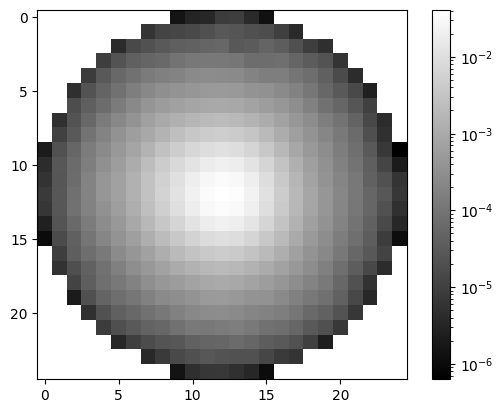

In [154]:
from matplotlib.colors import LogNorm
plt.imshow(psf, cmap='gray', Norm=LogNorm())
plt.colorbar()

In [155]:
np.sum(psf)

1.0

In [156]:
hdu = fits.PrimaryHDU(psf)
hdu.writeto(dr+'/psf.fits', clobber=True)

In [104]:
mask = np.zeros_like(cutout.data)

In [9]:
for i in range(45, 53):
    for j in range(76, 84):
        mask[j][i]=1

In [5]:
for i in range(30, 40):
    for j in range(12, 22):
        mask[j][i]=1

In [105]:
for i in range(59, 65):
    for j in range(19, 25):
        mask[j][i]=1

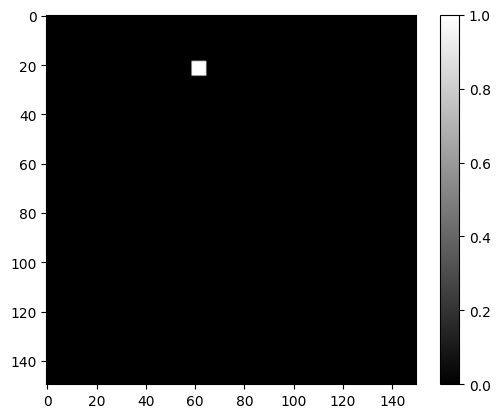

In [106]:
plt.imshow(mask, cmap='gray')
plt.colorbar()

In [107]:
hdu = fits.PrimaryHDU(mask)
hdu.writeto(dr+'mask.fits', clobber=True)

In [32]:
std_sky = np.std(cutout.data)
flux_sky = std_sky**2 * 1.62
print(flux_sky)
std_sky

55232807.883060314


5839.0347

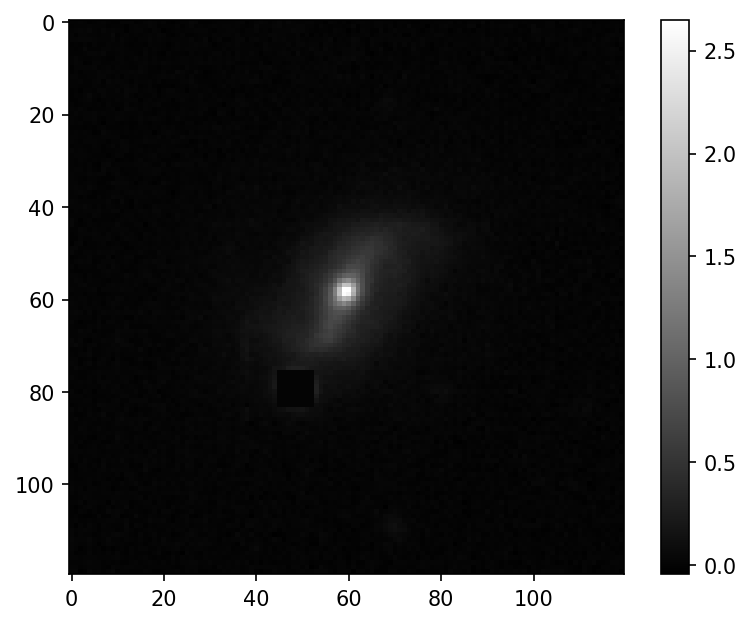

In [11]:
image_data = fits.getdata('J1329+56/image.fits')
for i in range(45, 53):
    for j in range(76, 84):
        image_data[j][i]=0
plt.imshow(image_data, cmap='gray')
plt.colorbar()        

In [12]:
hdu = fits.PrimaryHDU(image_data)
hdu.writeto('J1329+56/image_new.fits', clobber=True)

In [53]:
#position = (13817.176, 6105.3219)
#position = (13626.554, 5955.7477)
position = (1164.8021, 1054.3717)
size = (50, 50)     # pixels
cutout = Cutout2D(image_data, position, size)

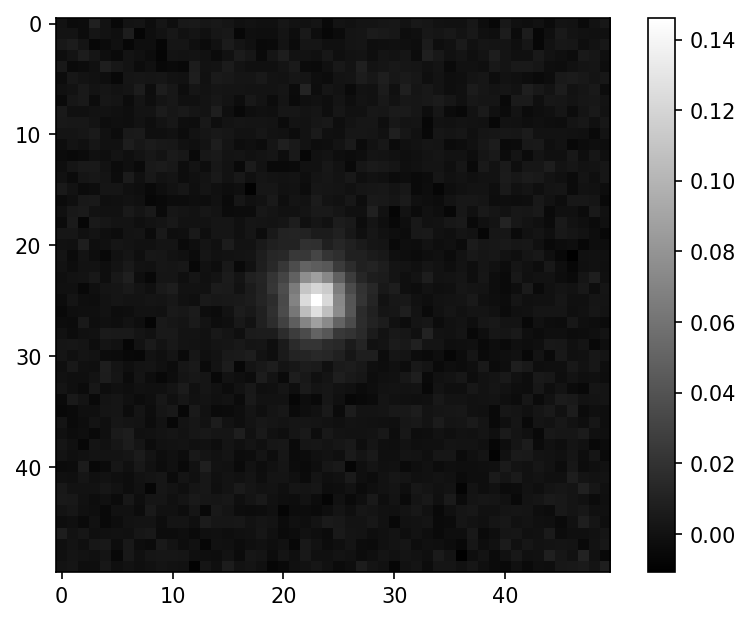

In [55]:
from matplotlib.colors import LogNorm
plt.imshow(cutout.data, cmap='gray')
plt.colorbar()

In [56]:
psf_data = cutout.data
#full_psf_data = psf_data + flux_sky
#err_flux_psf = np.sqrt(full_psf_data/1.62)
hdu = fits.PrimaryHDU(psf_data)
hdu.writeto('J1448+16/psf_raw.fits', clobber=True)

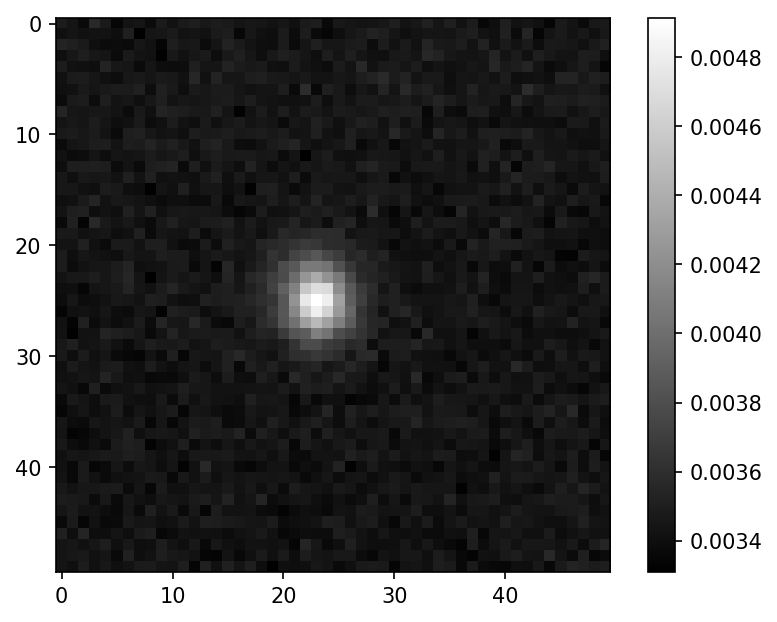

In [57]:
from matplotlib.colors import LogNorm
err_psf = 1/np.sqrt(Cutout2D(var_data, position, size).data)
plt.imshow(err_psf, cmap='gray')
plt.colorbar()

In [58]:
hdu = fits.PrimaryHDU(err_psf)
hdu.writeto('J1448+16/psf_var.fits', clobber=True)

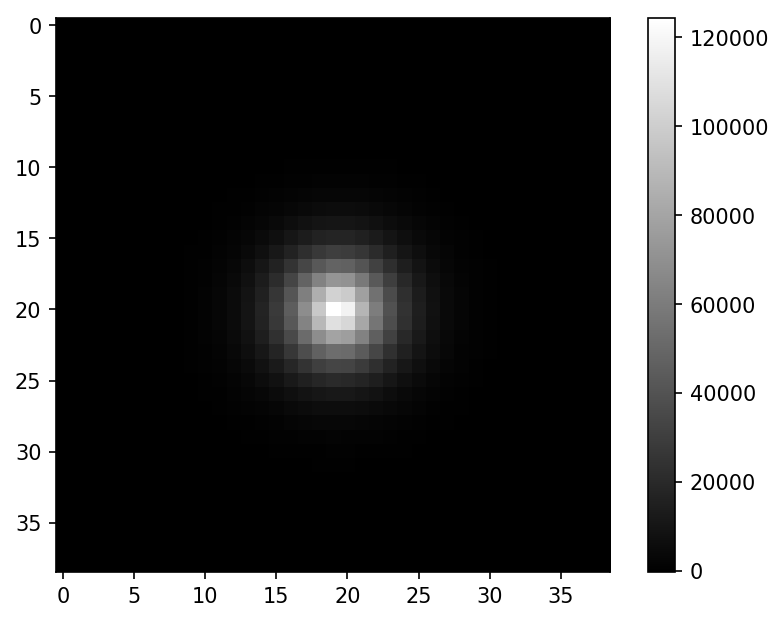

In [58]:
psf_model = fits.getdata('../J1046+57/.fits')
plt.imshow(psf_model, cmap='gray')
plt.colorbar()

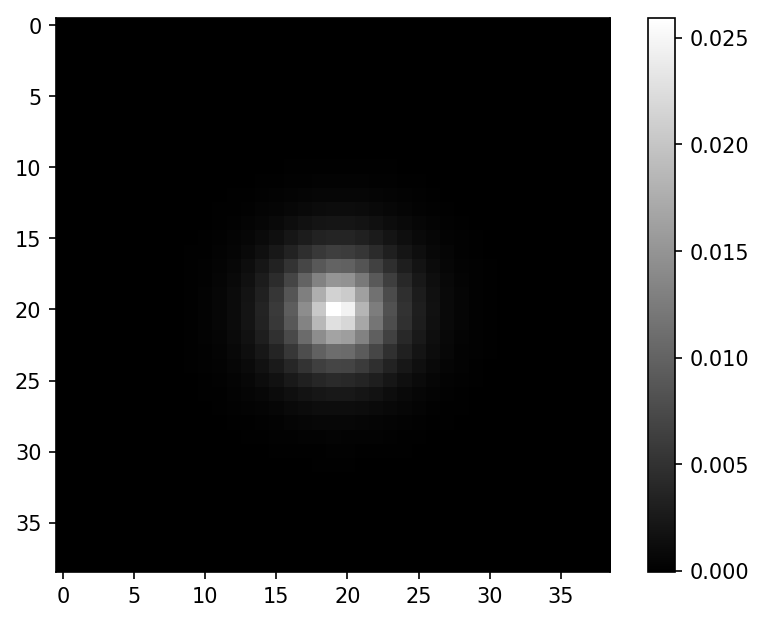

In [59]:
summ = np.sum(psf_model)
psf_model = psf_model/summ
plt.imshow(psf_model, cmap='gray')
plt.colorbar()

In [60]:
hdu = fits.PrimaryHDU(psf_model)
hdu.writeto('../J1046+57/psf_model_norm', clobber=True)

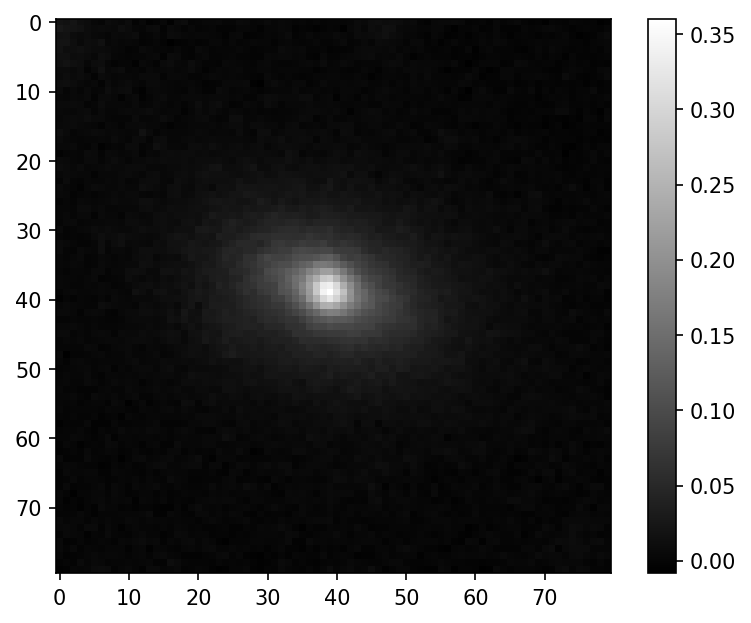

In [13]:
from matplotlib.colors import LogNorm
position = (2593.7268, 209.6058)
size = (80, 80)     # pixels
cutout = Cutout2D(image_data, position, size)
plt.imshow(cutout.data, cmap='gray')
plt.colorbar()

In [53]:
gal_data = cutout.data
full_gal_data = gal_data + flux_sky
hdu = fits.PrimaryHDU(gal_data/9280)
hdu.writeto('../J1046+57/gal.fits', clobber=True)
err_flux_gal = np.sqrt(full_gal_data/1.62)
hdu = fits.PrimaryHDU(err_flux_gal/9280)
hdu.writeto('../J1046+57/gal_var.fits', clobber=True)

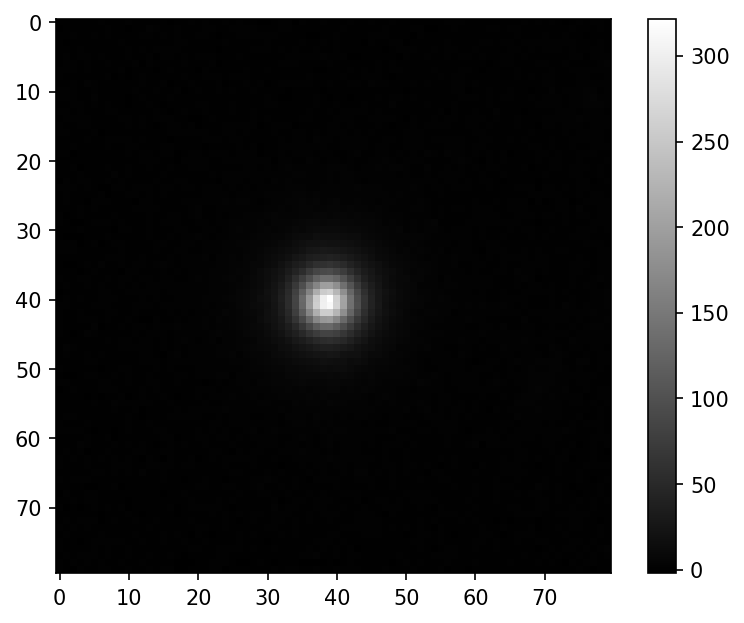

In [57]:
plt.imshow(gal_data/9280, cmap='gray')
plt.colorbar()

In [34]:
m_b, m_disk = 19.4325, 18.0988
-2.5 * np.log10(10**(-0.4*m_b) + 10**(-0.4*m_disk))

17.82000055795103

In [35]:
from astropy import units as u
m_b = m_b * u.ABmag
m_b

<Magnitude 19.4325 mag(AB)>

In [36]:
J = m_b.to(u.Jy)
J

<Quantity 6.12350392e-05 Jy>

In [51]:
J = J.to(u.erg / u.s / u.cm**2 / u.Hz)

In [52]:
def flux_to_luminosity(flux, z=None, d=None):
    """
    @param flux: flux in erg/s/cm2
    @param z: redshift, or:
    @param d: distance in Mpc
    """
    if d:
        d = d * u.Mpc
    else:
        d = cosmo.luminosity_distance(z).to(u.cm)   
    return 4 * np.pi * (d.to(u.cm))**2 * (flux)

In [53]:
from astropy.cosmology import WMAP9 as cosmo
L = flux_to_luminosity(J, z=0.029)

In [54]:
L

<Quantity 1.20501946e+27 erg / (Hz s)>

In [110]:
from astropy.io import fits
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
dat_psf = fits.getdata('hst/587725491599114507/res_catalog.psf')[0][0][0]
#print(dat_psf)
#print(dat_psf.shape)
psfi = dat_psf[12,:]
print(psfi)
f = interp1d(np.linspace(0, len(psfi) - 1 , len(psfi)),psfi)
step_prof = 0.052098684819243735 / 2.0
psf = f(np.linspace(0, len(psfi) - 1 , int(len(psfi)/step_prof)))
fwhm = 2.50 / step_prof
sigma = fwhm / 2.355
x_psf = np.linspace(0, 1000, 1001)
psf = np.exp(- 0.5 * ((x_psf - 1001/2.0)/sigma)**2)
psf[psf<0] = 0
#psf = psf/sum(psf)

[ 0.0000000e+00 -4.1307280e-06  1.0472842e-04  4.3867517e-04
  6.0085842e-04  9.6343324e-04  1.4506225e-03  3.6714354e-03
  7.5247562e-03  1.9517798e-02  5.8033846e-02  1.1681108e-01
  1.4797351e-01  1.0932653e-01  4.2694297e-02  2.0132596e-02
  1.2203028e-02  6.0000201e-03  2.2395458e-03  1.1425992e-03
  6.7698892e-04  4.7263413e-04  3.0388506e-04  2.7937371e-05
  2.3087624e-08]


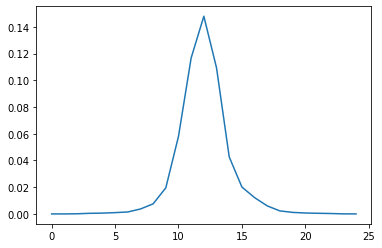

In [107]:
plt.plot(psfi)

102.15091637550124

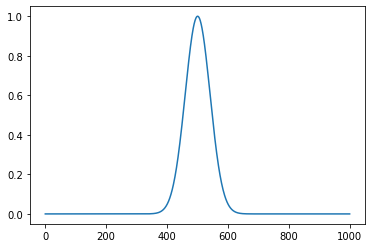

In [108]:
plt.plot(psf)
np.sum(psf)

N points =  19919
40.75231952393852
1.584893192461111e-09
[           inf 4.36065190e-11 3.21136338e-11 ... 3.10304253e-11
 3.10304253e-11 3.10304253e-11]
[  -0.75257499   -0.75257588   -0.75257854 ... -352.7206903  -352.75603644
 -352.79138437]


/home/vika/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


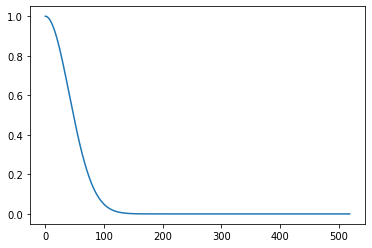

In [104]:
import pandas as pd
from scipy.special import erf
df = pd.read_csv('hst/587725491599114507/isolist.csv')
x = df['x']
N_points = int(np.max(x * 1.1) / step_prof)
print('N points = ', N_points)
x_prof = np.linspace(0, np.max(x * 1.1), N_points)
#x_prof = np.linspace(0, 0.2, N_points)
mu_0 = 22
print(sigma)
I_0 = 10.**(-0.4*mu_0)
#I_0 = mu_0
print(I_0)
prof = np.exp(-0.5*(x_prof/sigma)**2)
coeff = 2*I_0/(np.sqrt(2*np.pi)*sigma*erf(x_prof/np.sqrt(2)*sigma))
print(coeff)
coeff=0.5
prof2 = coeff*np.exp(-(x_prof)**2/(2*(sigma*coeff)**2))
prof3 = np.exp(-(x_prof)**2/(2*sigma**2))
#plt.plot(x_prof, prof)
print(2.5*np.log10(prof2))
#plt.plot(x_prof, prof)
plt.plot(x_prof, prof)

In [47]:
from scipy.special import erf
erf(-0.5)

-0.5204998778130465

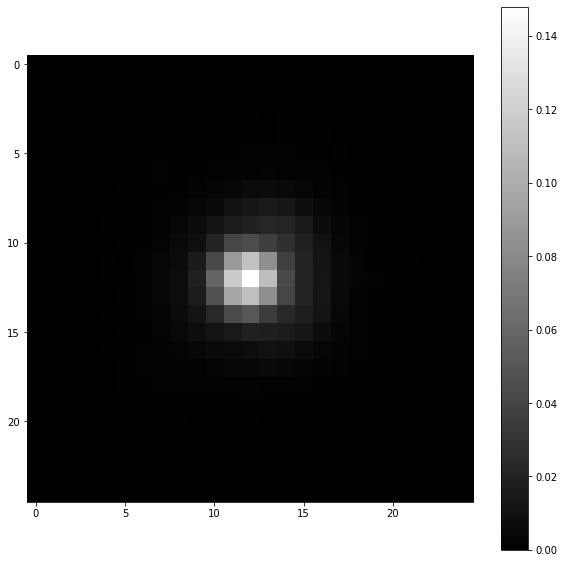

In [111]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
plt.imshow(dat_psf, cmap='gray')
plt.colorbar()

In [113]:
hdu = fits.PrimaryHDU(dat_psf)
hdu.writeto('hst/587725491599114507/psf.fits', clobber=True)

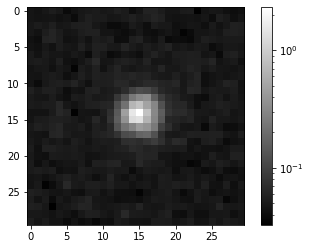

In [121]:
from astropy.nddata import Cutout2D
image_data = fits.getdata('hst/587725491599114507/hst_11142_0m_acs_wfc_f814w_drz.fits')
position = (4075.7547, 1328.5721)
size = (30, 30)   # pixels
cutout = Cutout2D(image_data, position, size)
data = cutout.data
plt.imshow(data, cmap='gray', Norm=LogNorm())
plt.colorbar()

In [122]:
hdu = fits.PrimaryHDU(data)
hdu.writeto('hst/587725491599114507/forpsf.fits', clobber=True)

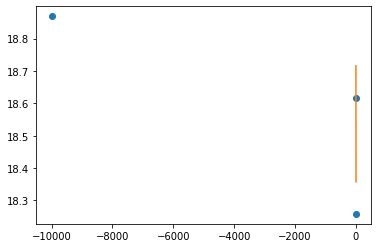

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = [-9999, 2.8, 5.7]
y = [18.868853, 18.616888, 18.258404]
f = interp1d(x, y, kind='quadratic')
xnew = np.arange(2, 5, 0.1)
ynew = f(xnew)
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.xlim(())

In [58]:
f(3)

array(18.68061882)

In [66]:
y

[[nan, nan, nan], [nan, nan, nan], [18.868853, 18.716888, 18.258404]]